In [1]:
dict_ = {'kit_type': 'Timing Chain',
         'kit_no': 1,
         'kit_type_code': '5724',
         'kit_manufacturer': 'MELLING',
         'kit_part_number': '715F',
         'kit_url': 'https://www.rockauto.com/en/parts/MELLING,715F,Timing Chain,5724&Lennon=1',
         'kit_part_code': '8306448',
         'kit_join_mpntcpc': 'MELLING;715F;5724;8306448',
         'kit_info_url': 'https://www.rockauto.com/en/moreinfo.php?pk=8306448&cc=0&pt=5724',
         'kit_json_src': '{"0": "https://www.rockauto.com/info/583/715F-1-ANG.jpg"}'}

dict_

{'kit_type': 'Timing Chain',
 'kit_no': 1,
 'kit_type_code': '5724',
 'kit_manufacturer': 'MELLING',
 'kit_part_number': '715F',
 'kit_url': 'https://www.rockauto.com/en/parts/MELLING,715F,Timing Chain,5724&Lennon=1',
 'kit_part_code': '8306448',
 'kit_join_mpntcpc': 'MELLING;715F;5724;8306448',
 'kit_info_url': 'https://www.rockauto.com/en/moreinfo.php?pk=8306448&cc=0&pt=5724',
 'kit_json_src': '{"0": "https://www.rockauto.com/info/583/715F-1-ANG.jpg"}'}

In [2]:
import json

In [3]:
dict_src = json.loads(dict_['kit_json_src'])

dict_src

{'0': 'https://www.rockauto.com/info/583/715F-1-ANG.jpg'}

In [4]:
not dict_src

False

In [5]:
import requests

import sys
sys.path.append('../00.Tools')
from configuration import generate_header, generate_proxy

In [6]:
response = requests.get(dict_src['0'],
                        headers=generate_header(),
                        proxies=generate_proxy(),
                        timeout=(10, 15),
                        allow_redirects=False)

response.status_code

200

In [7]:
from PIL import Image
from io import BytesIO

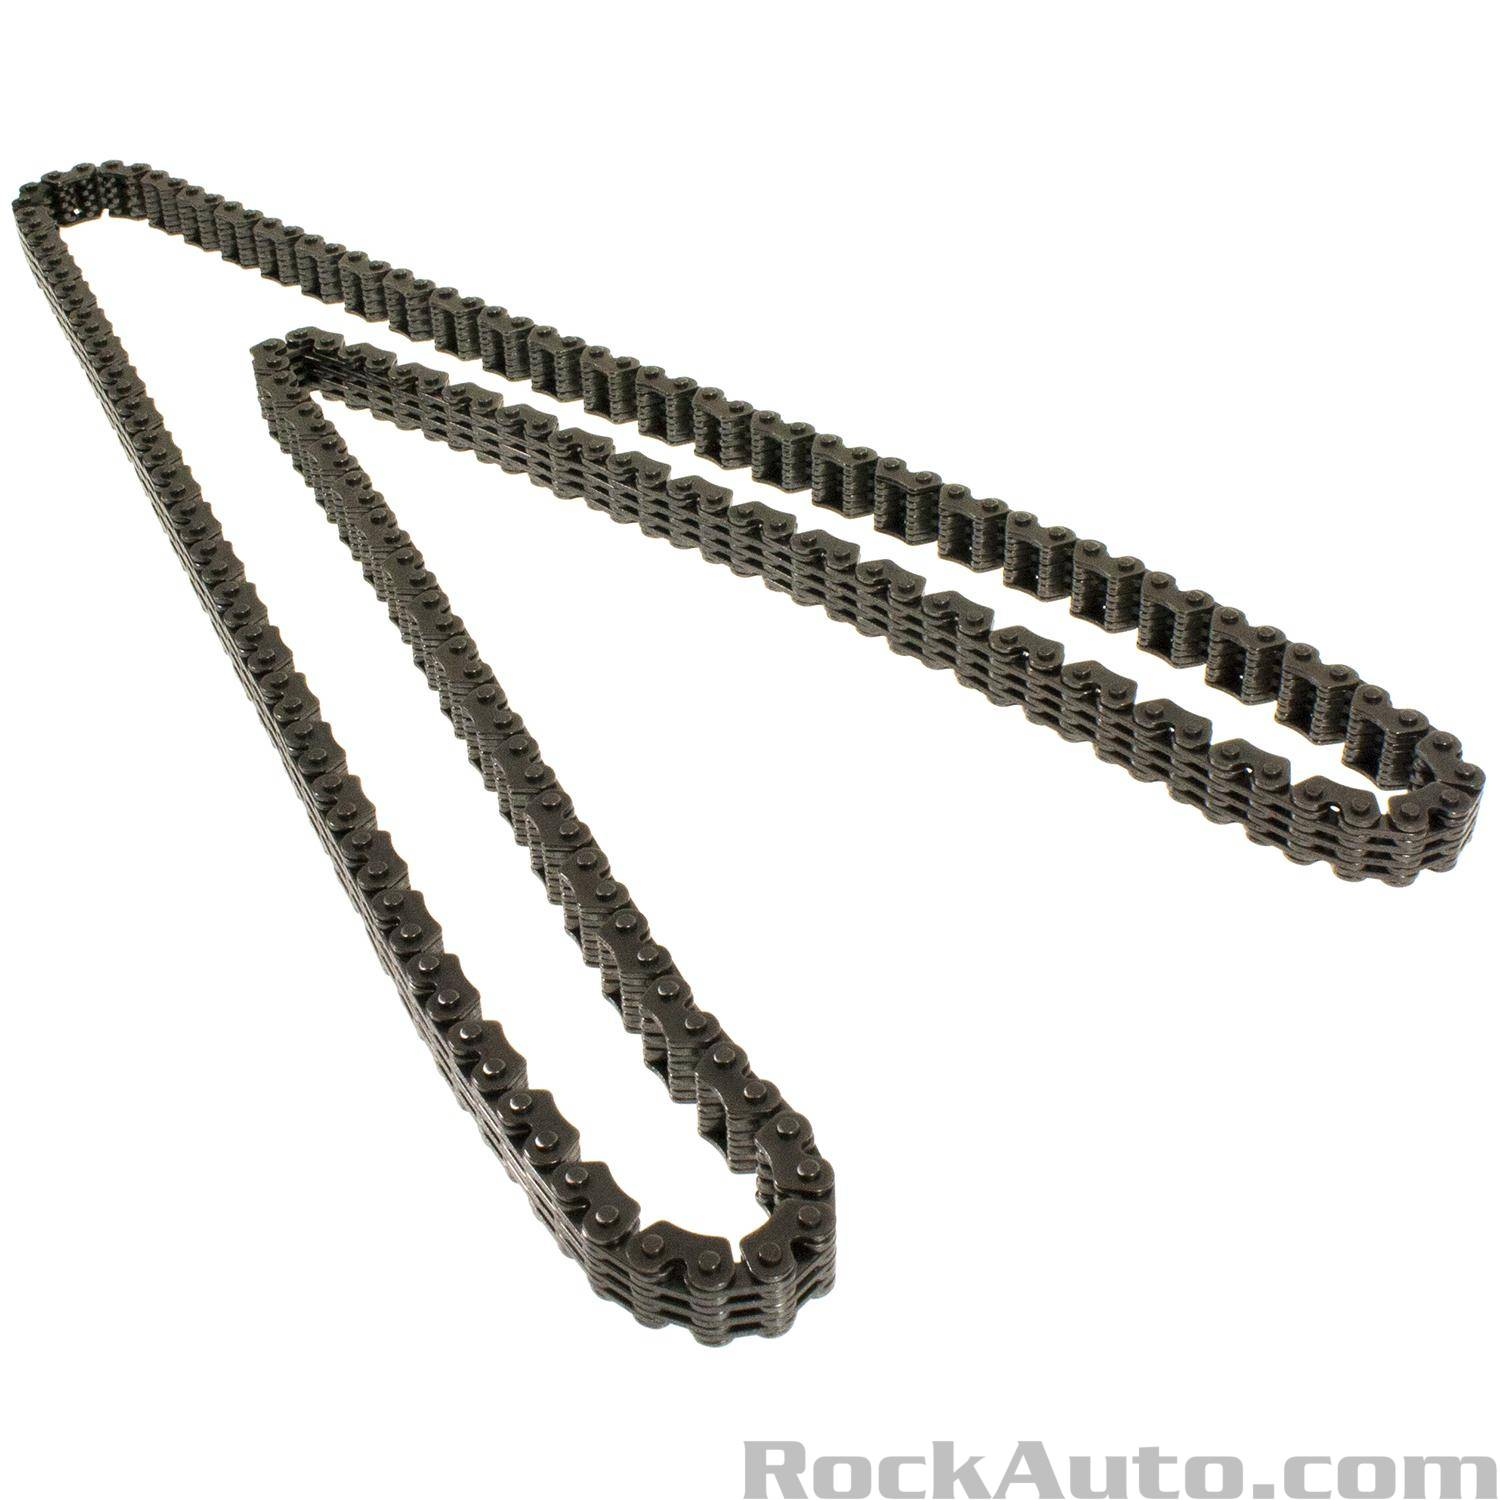

In [8]:
img = Image.open(BytesIO(response.content)).convert('RGB')

img

In [9]:
buffer = BytesIO()
img.save(buffer, format="PNG")
buffer.seek(0)

with open(f'''./10.img-{dict_['kit_join_mpntcpc'].replace('/', '-')}.png''', 'wb') as pic:
    pic.write(buffer.getvalue())